# Abstract
Between 2019 and 2029, the U.S. Bureau of Labor Statistics predicts an increase of 30,206,900 jobs in the US. As we know, all jobs are not created equal, meaning this increase will not be felt uniformly across every industry. The goal of this project is to find the model that best predicts job growth and decay shift in a meaningful way. This is worth studying, since this directly describes how the U.S. government sees the job market transforming over the next decade.

The data used was scraped from the [U.S. Bureau of Labor Statistics website](https://www.bls.gov/ooh/a-z-index.htm) and was processed into the file used below. After a brief exploratory analysis of the data, the goal became, how well can we predict "Employment Change, 2019-29" using the other columns as features. A linear regression was the obvious starting point for this task but didn't yield any meaningful results. Using the features only relevant to 2019 data, the Linear Regression only had an $R^2$ value of 0.09 when run on the training. This was incredibly low of a score and would be interesting to further investigate why the Linear Regression performed so poorly.

Using the same features, the next task was to fit a Decision Tree to the data. Both models performed well, although the Decision Tree Classifier perform much better than the Decision Tree Regressor, with accuracy scores of 0.90 and 0.82 respectively. This came as a surprise considering that the target variable was continuous. 

At this time, the original goal has been accomplished, although further investigation needs to take place to establish why the Decision Tree Classification Model out-performed Decision Tree Regression Model in predicting a continuous variable.

# Importing Data and Libraries

In [1]:
from import_file import *

# data = pd.read_csv("../CSV/BLS_jobs_data_cleaned.csv")
data = pd.read_csv("../CSV/BLS_jobs_data_cleaned.csv")
display(data.head(3))

,URL,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Employment Change, 2019-29",Job_Title,Yearly_Wage,Hourly_Wage,Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription
0,https://www.bls.gov/ooh/arts-and-design/craft-...,See How to Become One,None,Long-term on-the-job training,51900,100,Portrait artists,48760.0,23.44,0.00,Little or no change
1,https://www.bls.gov/ooh/management/human-resou...,Bachelor's degree,5 years or more,None,165200,10400,Personnel directors,116720.0,56.11,0.06,Faster than average
2,https://www.bls.gov/ooh/management/farmers-ran...,High school diploma or equivalent,5 years or more,None,952300,-61600,Nursery managers,71160.0,34.21,-0.06,Decline


# Decision Tree Regressor
This model performed well with an accuracy of 82% on unseen data, although this came at the cost of readability. The resulting data tree can be seen below, where there is a max depth of 26 and a total of 271 leaves. While you can follow each respective path for a given sample, it not practical to follow through that many decisions. 
<pre>
Accuracy on Unseen Data:  82%
Max Depth:                34
Number of Leaves:         273
</pre>

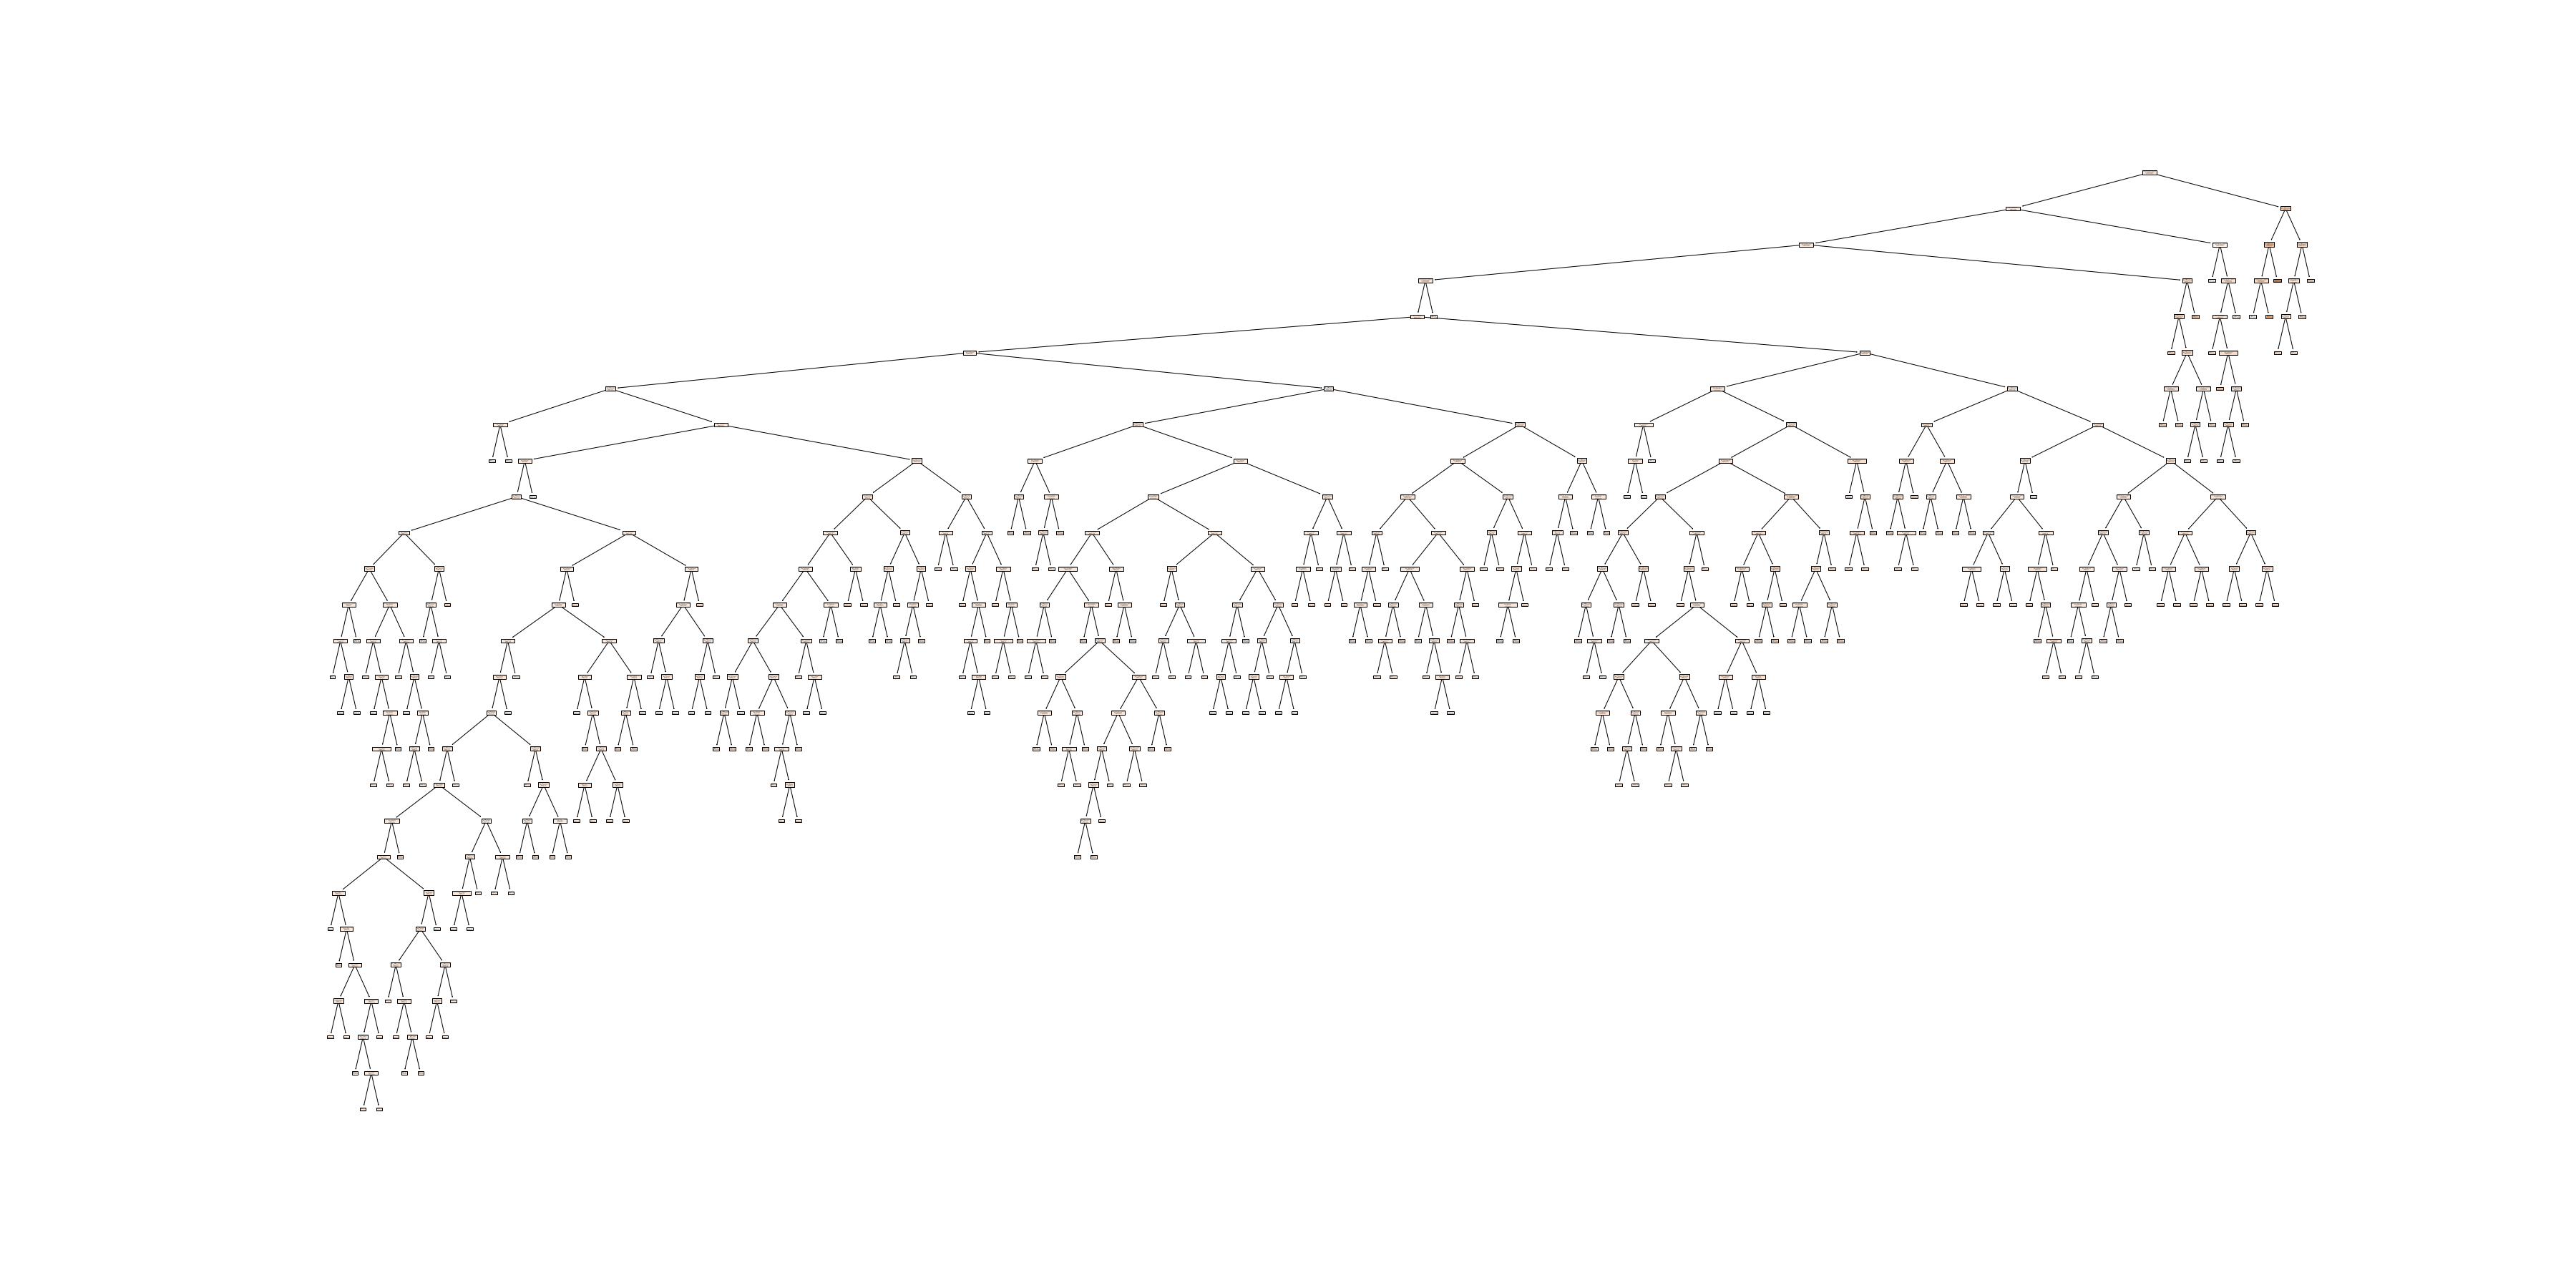

In [2]:
display(Image(filename="../Images/DecisionTreeRegressor_Tree_Plot_Depth_26.png"))
# display(Image(filename="../Images/DecisionTreeRegressor_Line_Avg-CV-10-Score_vs_Depth.png"))

# Decision Tree Classifier
Interestingly, the Decision Tree Classifier outperformed the Decision Tree Regressor despite the fact that the target was a continuous variable. It is important to note that this comes with a limitation of readability. 

In an attempt to find an accurate tree that kept this in mind, I plotted the average accuracy over max depth allowed in the tree. More specifically I used the average accuracy from a 10-fold cross validation at each specified depth. The initial hypothesis was that if the model was allowed to go as deep as there were features provided, then each level of the tree would correspond to a decision on a unique feature and lend respectable results. As we can see in the graph below this wasn't necessarily the case. When the model was held to a max depth of 6, the number of features used, it scored only scored an accuracy of less than 40%. This led to the decision to abandon readability as a primary goal and direct the focus prediction accuracy.

<pre>
Accuracy on Unseen Data:  90%
Max Depth:                34
Number of leaves:         273
</pre>

<img src="../Images/DecisionTreeClassifier_Line_Avg-CV-10-Score_vs_Depth.png" width="500" height="500" align="center"/>

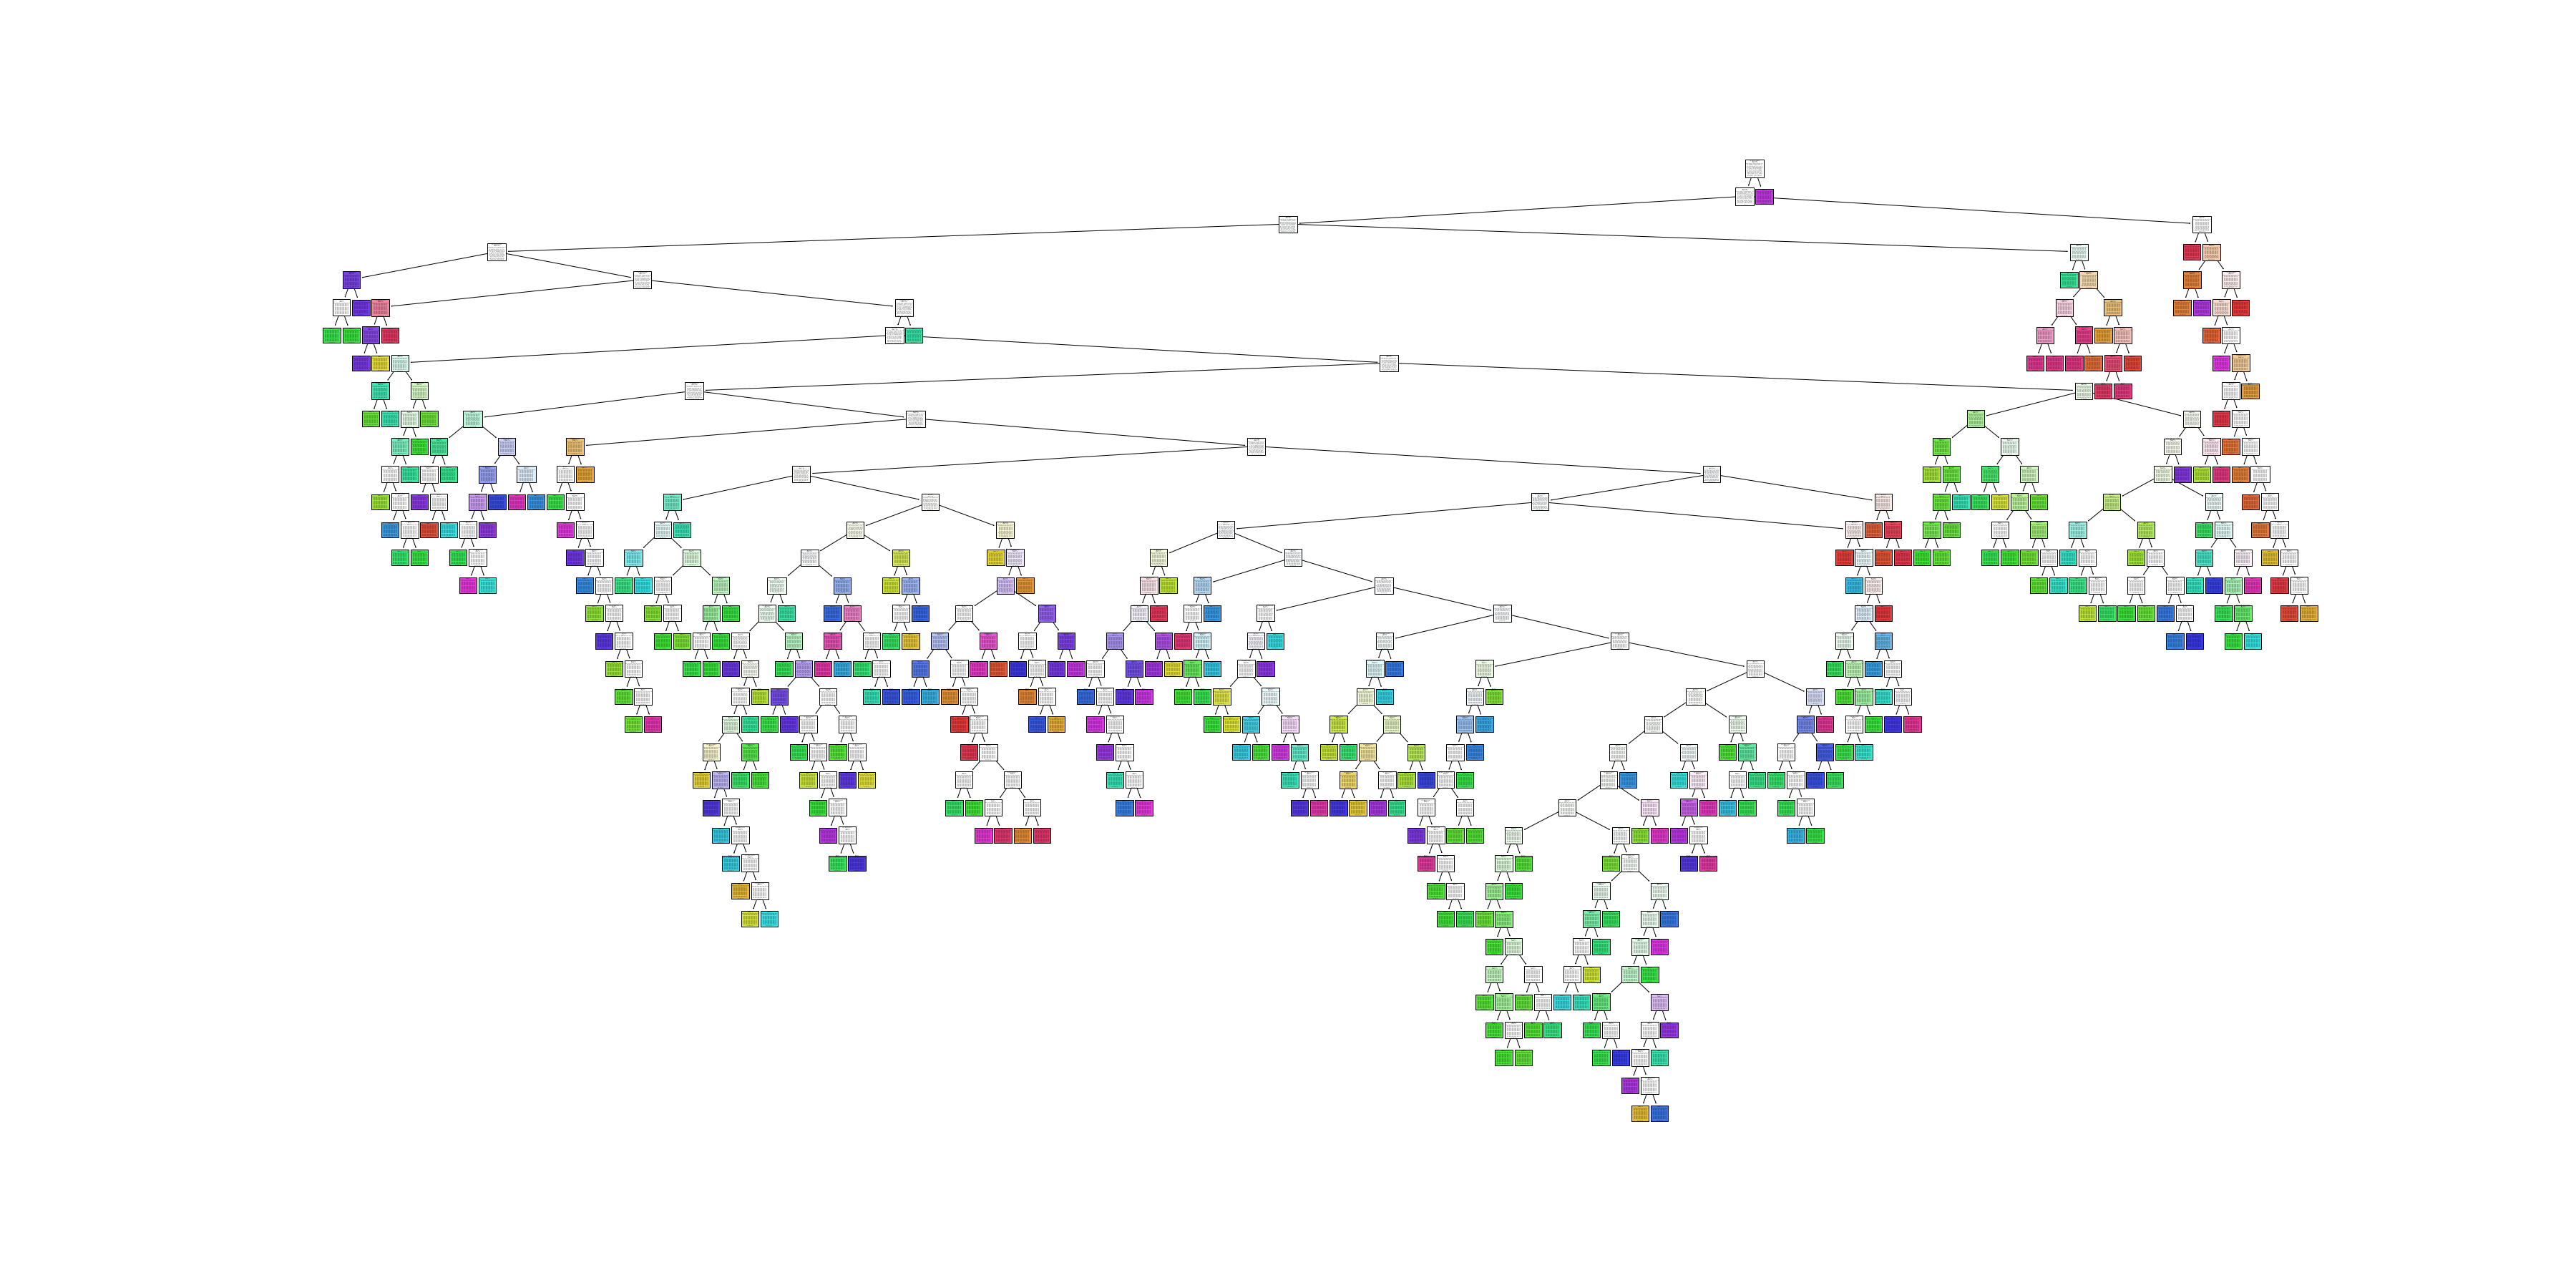

In [5]:
display(Image(filename="../Images/DecisionTreeClassifier_Tree_Plot_Depth_34.png"))
# display(Image(filename="../Images/DecisionTreeClassifier_Line_Avg-CV-10-Score_vs_Depth.png"))

# Conclusion
I was able to succefully create a model, with a high degree of accuracy that predicts the projected US job growth, as the Bureau of Labor Statstics reports. As mentioned extensivly above, further knowldge and research on sklearn Decision Trees would be valuable in determining why our model performed as well as it did. Additionally, further models could be further explored to see validate that Decision Tree Classifier is in fact the best modeling tool for this task.

At the time of this project, the U.S. is in the middle of an election season where the candidates are as polarizing as any other time in U.S. history. It would be interesting to see if the Bureau of Labor Statstics continues to report similar figures, or if the projected job market will dramatically change in the years to come.